O trabalho a seguir busca analisar informações sobre o rendimento de alunos de um curso na disciplina de Algorítimos 1, entre os anos de 2011 e 2022. Para isso, utilizarei majoritariamente o Python como ferramenta de análise, com as bibliotecas Pandas e Seaborn, o meu intuito aqui é entender o problema, preparar os dados, fazer uma análise exploratória, analisar e trazer os principais insights observados. 

In [4]:
#Importando as bibliotecas e pacotes 
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Definindo o dataframe que será trabalhado a seguir
df = pd.read_csv(r'C:\Users\joao.batista\Desktop\Pós Graduação - DSBD\Linguagens de Programação\Trabalho 1\historico-alg1_SIGA_ANONIMIZADO.csv')

In [6]:
df.head()

,matricula,codigo,disciplina,periodo,ano,curriculo,ch,nota,frequencia,status,tipo,observacao,natureza,situacaoDiscente,nomeTuma,codigoCurriculoSie
0,0,CI055,ALGORITMOS E ESTRUTURAS DE DADOS I,1,2016,Sim,60,67,96,Aprovado,TURMA,C,Obrigatória,Conclusão formatura,NaN,21A
1,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2019,Sim,60,0,73,R-freq,TURMA,NaN,Obrigatória,Registro ativo,A,21A
2,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2019,Sim,60,11,76,R-nota,TURMA,NaN,Obrigatória,Registro ativo,B,21A
3,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,2,2020,Sim,60,0,0,Cancelado,TURMA,NaN,Obrigatória,Registro ativo,B,21A
4,1,CI1055,ALGORITMOS E ESTRUTURAS DE DADOS 1,1,2020,Sim,60,0,0,Cancelado,TURMA,NaN,Obrigatória,Registro ativo,ERE 2 - D,21A


Extraindo as informações iniciais do dataframe e realizando os primeiros tratamentos


In [7]:
#Entendendo quais os tipos de dados de cada uma das colunas do dataframe
df.dtypes

matricula              int64
codigo                object
disciplina            object
periodo               object
ano                    int64
curriculo             object
ch                     int64
nota                   int64
frequencia             int64
status                object
tipo                  object
observacao            object
natureza              object
situacaoDiscente      object
nomeTuma              object
codigoCurriculoSie    object
dtype: object

In [8]:
#Utilizando a função describe para obter algumas informações iniciais a respeito do dataframe, como média de notas, contagem de matrículas etc.
df.describe()

,matricula,ano,ch,nota,frequencia
count,909.000000,909.000000,909.0,909.000000,909.000000
mean,287.009901,2019.002200,60.0,45.251925,70.081408
std,171.329142,2.160416,0.0,36.945658,42.035699
min,0.000000,2011.000000,60.0,0.000000,0.000000
25%,134.000000,2018.000000,60.0,0.000000,0.000000
50%,288.000000,2019.000000,60.0,53.000000,93.000000
75%,437.000000,2021.000000,60.0,79.000000,100.000000
max,572.000000,2022.000000,60.0,100.000000,100.000000


Primeiro ajuste no dataframe: Padronizar os status de reprovação

In [9]:
'''Atenção: R-nota indica REPROVAÇÃO POR NOTA e R-freq REPROVAÇÃO POR FALTA. Se houver outro "status" para representar reprovação, este dever ser trocado para o rótulo adequado (R-nota ou R-freq). 
Frequências < 75 causam reprovação por falta; Médias abaixo de 50 causam reprovação por nota.
'''
df['status'].value_counts()

status
Aprovado       624
R-nota         162
R-freq          49
Cancelado       37
Matriculado     36
Reprovado        1
Name: count, dtype: int64

In [10]:
df[(df['nota'] < 75) & (df['frequencia'] < 50) & (df['status'] == 'R-freq') | (df['status'] == 'R-nota')]
df['status'].replace(to_replace='Reprovado',value='R-freq', inplace=True)

Segundo ajuste no dataframe: Remoção dos alunos marcados como EQUIVALÊNCIA e APROVEITAMENTO
* Durante parte do período analisado o currículo disciplinar passou por algumas alterações, para garantir que os alunos que já haviam sido aprovados não precisassem refazer a disciplina, eles foram incluídos novamente na disciplina mas dessa vez com o status de Equivalência ou Aproveitamento, recebendo nota zero mas mesmo assim sendo aprovados. Sendo assim, iremos excluí-los do dataframe para não comprometer a análise, afinal, se trata de duplicidades. 

In [11]:
df = df[~df['tipo'].isin(['EQUIVALENCIA', 'APROVEITAMENTO'])]


1. Qual é a média de nota dos aprovados (no período total e por ano)?



In [12]:
# Média de notas no período total, arredondando para 2 casas decimais. 
df_aprovados = df[df['status'] == 'Aprovado']
df_aprovados['nota'].mean().round(2)

77.58

In [13]:
# Média de notas por ano
df_aprovados = df_aprovados[['ano','nota']].groupby(['ano']).mean().round(2).reset_index()
df_aprovados

,ano,nota
0,2011,50.00
1,2013,72.71
2,2014,70.67
3,2015,68.58
4,2016,72.09
5,2017,78.11
6,2018,76.41
7,2019,74.74
8,2020,84.47
9,2021,83.88


2. Qual é a média de nota dos reprovados por nota (período total e ano)?



In [14]:
# Média de notas dos reprovados por nota no período total
df_reprovados_nota = df[df['status'] == 'R-nota']
df_reprovados_nota['nota'].mean().round(2)

22.04

In [15]:
# Média de notas dos reprovados por nota por ano
df_reprovados_nota = df_reprovados_nota[['ano','nota']].groupby(['ano']).mean().round(2).reset_index()
df_reprovados_nota

,ano,nota
0,2012,24.00
1,2013,30.00
2,2014,25.00
3,2015,19.83
4,2016,15.40
5,2017,25.90
6,2018,23.14
7,2019,23.32
8,2020,25.88
9,2021,19.59


3. Qual é a frequência dos reprovados por nota (período total e por ano)?

In [16]:
# Frequência de reprovados por nota no período total, valor em porcentagem. 
(df['status'].value_counts(normalize=True)['R-nota'] * 100).round(2)

21.18

In [17]:
# Frequência de reprovados por nota por ano, valores em porcentagem. 
frequencia_por_ano_rnota = df.groupby('ano')['status'].value_counts(normalize=True).unstack()['R-nota'].reset_index()
frequencia_por_ano_rnota['R-nota'] = (frequencia_por_ano_rnota['R-nota'] * 100).round(2)
frequencia_por_ano_rnota

,ano,R-nota
0,2011,NaN
1,2012,50.00
2,2013,30.00
3,2014,8.33
4,2015,18.18
5,2016,10.00
6,2017,23.60
7,2018,24.18
8,2019,23.33
9,2020,8.33


4. Qual a porcentagem de evasões (total e anual)?

In [18]:
# Porcentagem total de evasões
(df['situacaoDiscente'].value_counts(normalize=True)['Evasão'] * 100).round(2)

15.29

In [19]:
# Porcentagem de evasões por ano
evasoes_ano = df.groupby('ano')['situacaoDiscente'].value_counts(normalize=True).unstack()['Evasão'].reset_index()
evasoes_ano['Evasão'] = (evasoes_ano['Evasão'] * 100).round(2)
evasoes_ano

,ano,Evasão
0,2011,NaN
1,2012,NaN
2,2013,70.00
3,2014,25.00
4,2015,15.15
5,2016,14.00
6,2017,19.10
7,2018,24.18
8,2019,15.83
9,2020,17.71


5. Como os anos de pandemia impactaram no rendimento dos estudantes em relação aos anos anteriores, considerando o rendimento dos aprovados, a taxa de cancelamento e as reprovações? Considere como anos de pandemia os anos de 2020 e 2021.

In [20]:
# Criando uma função que irá marcar os anos de pandemia, se o ano for 2020 e 2021 receberá valor "sim", do contrário, receberá "nao"
def ano_de_pandemia(ano):
    if ano == 2020 or ano == 2021:
        return 'sim'
    else:
        return 'nao'

In [21]:
df_aprovados['ano_de_pandemia'] = df_aprovados['ano'].apply(ano_de_pandemia)
df_aprovados

,ano,nota,ano_de_pandemia
0,2011,50.00,nao
1,2013,72.71,nao
2,2014,70.67,nao
3,2015,68.58,nao
4,2016,72.09,nao
5,2017,78.11,nao
6,2018,76.41,nao
7,2019,74.74,nao
8,2020,84.47,sim
9,2021,83.88,sim


In [22]:
# Criando função que plota os gráficos com uma estilização padrão, mudando apenas as fontes de dados utilizadas, títulos, subtítulos e dimensões.
def plot_grafico(df,x,y,palette,hue,title,subtitle,y_subtitle):
    ax = sns.barplot(data=df, x=x, y=y, palette=palette, hue = hue, dodge = False)
    ax.set(xlabel='ano',ylabel=None)
    ax.set_title(title+"\n",size=12,loc='left',weight='bold')
    ax.text(s=subtitle,x=-0.5,y=y_subtitle,fontsize=11, ha='left',color='gray')
    ax.legend(loc='upper left',fontsize='small')
    ax.bar_label(ax.containers[0],fontsize=9)
    ax.bar_label(ax.containers[1],fontsize=9)
    ax.figure.set_size_inches(15, 6)

    sns.despine()

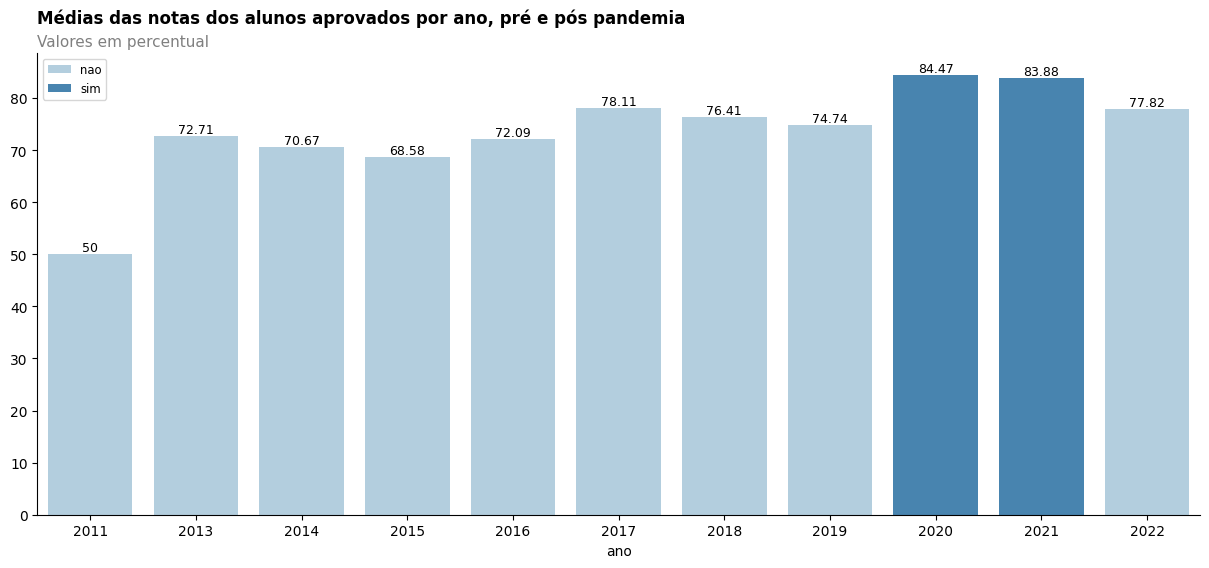

In [23]:
# Rendimento dos aprovados pré e pós pandemia
plot_grafico(df_aprovados,'ano','nota','Blues','ano_de_pandemia','Médias das notas dos alunos aprovados por ano, pré e pós pandemia','Valores em percentual',90)

In [24]:
df_cancelamentos = df.groupby('ano')['status'].value_counts(normalize=True).unstack()['Cancelado'].reset_index()
df_cancelamentos['ano_de_pandemia'] = df_cancelamentos['ano'].apply(ano_de_pandemia)
df_cancelamentos['Cancelado'] = (df_cancelamentos['Cancelado'] * 100).round(2)
df_cancelamentos


,ano,Cancelado,ano_de_pandemia
0,2011,NaN,nao
1,2012,NaN,nao
2,2013,NaN,nao
3,2014,8.33,nao
4,2015,NaN,nao
5,2016,2.00,nao
6,2017,NaN,nao
7,2018,NaN,nao
8,2019,NaN,nao
9,2020,20.83,sim


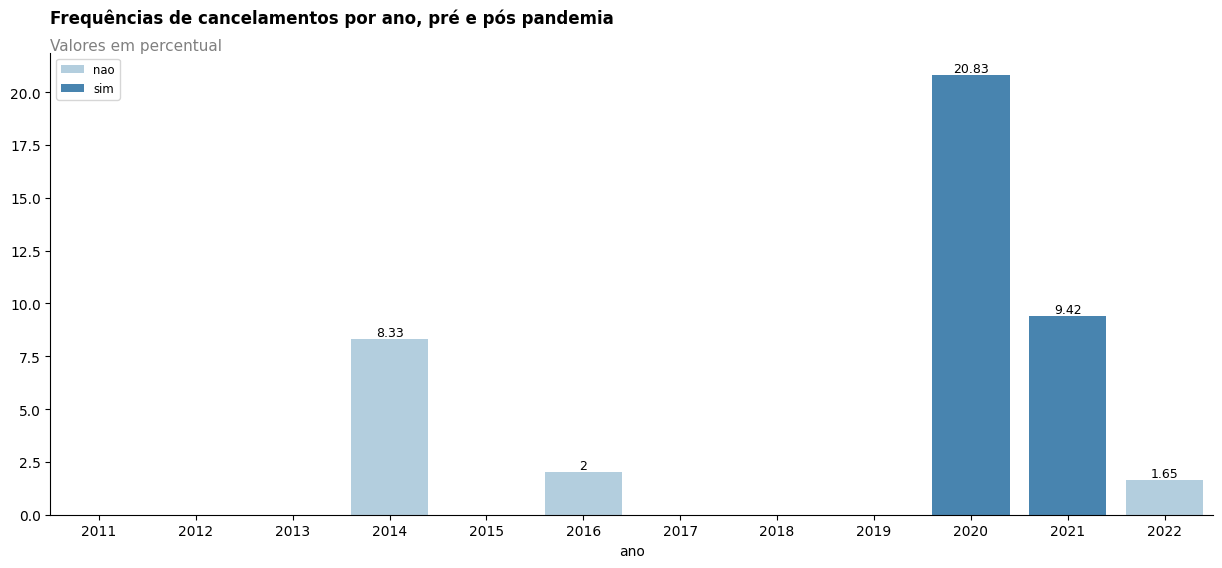

In [25]:
# Frequência de cancelamentos pré e pós pandemia
plot_grafico(df_cancelamentos,'ano','Cancelado','Blues','ano_de_pandemia','Frequências de cancelamentos por ano, pré e pós pandemia','Valores em percentual',22)

In [26]:
# Criando uma função que irá marcar os reprovados, se reprovado por frequência ou reprovado por nota, receberá valor "sim", do contrário, receberá "nao"
def reprovado(status):
    if status == 'R-freq' or status == 'R-nota':
        return 'sim'
    else:
        return 'nao'

In [27]:
df['reprovado'] = df['status'].apply(reprovado)
df_reprovados = df.groupby('ano')['reprovado'].value_counts(normalize=True).unstack()['sim'].reset_index()
df_reprovados['ano_de_pandemia'] = df_reprovados['ano'].apply(ano_de_pandemia)
df_reprovados['sim'] = (df_reprovados['sim'] * 100).round(2)
df_reprovados

,ano,sim,ano_de_pandemia
0,2011,NaN,nao
1,2012,100.00,nao
2,2013,30.00,nao
3,2014,41.67,nao
4,2015,21.21,nao
5,2016,12.00,nao
6,2017,25.84,nao
7,2018,29.67,nao
8,2019,29.17,nao
9,2020,12.50,sim


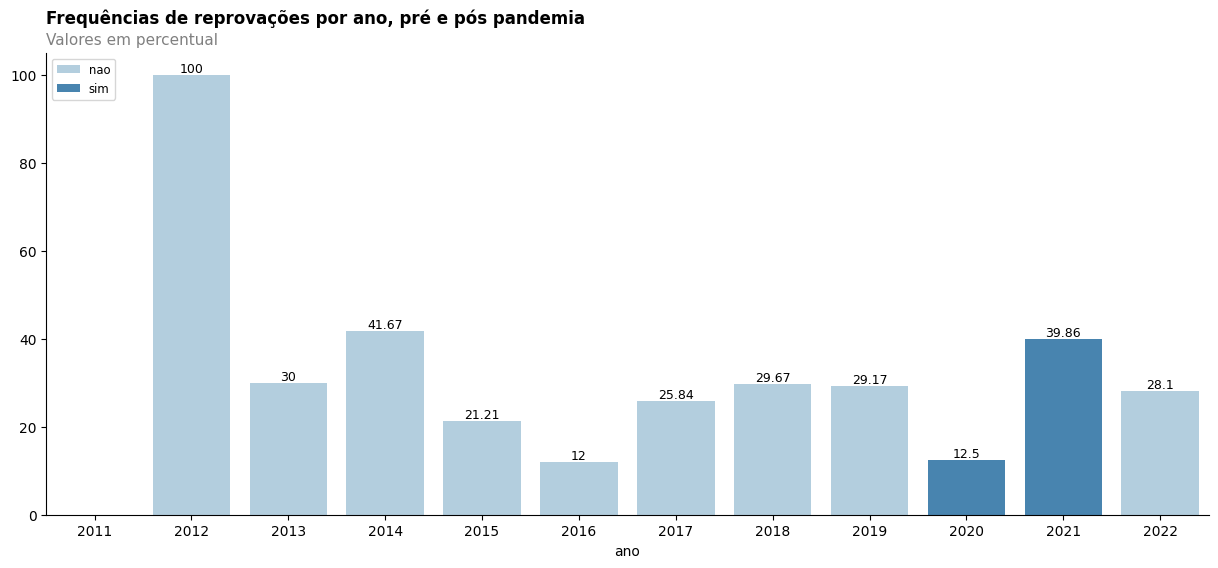

In [28]:
# Frequência de reprovados pré e pós pandemia
plot_grafico(df_reprovados,'ano','sim','Blues','ano_de_pandemia','Frequências de reprovações por ano, pré e pós pandemia','Valores em percentual',107)

Análise: 
Considerando o rendimento dos aprovados, o estudo nos mostra um aumento nas médias das notas dos alunos nos anos de pandemia (2020 e 2021) em relação aos anos anteriores. Durante o período pandêmico, as instituições de saúde orientaram que todas as pessoas ficassem em suas casas, sendo assim, uma das hipóteses que explicam o aumento das notas observado nos anos de pandemia pode ser a de que, já que estavam impedidos de realizarem atividades fora de casa, os estudantes dedicaram mais tempo aos estudos e obtiveram maior êxito na disciplina. Mesmo que tenha sido observado um aumento nas notas durante o período pandêmico, elas voltam a apresentar uma leve queda no ano pós pandemia (2022).

Já quando se fala em taxa de cancelamento da disciplina, em quase todo o período as taxas são baixas ou nulas, exceto pelos valores bem expressivos nos anos de pandemia, que podem ser explicados por diversas razões. Uma das hipóteses aqui é a de que uma parcela dos estudantes não se adaptaram ao modelo de aulas remotas e cancelaram a disciplina, esperando refazê-la um dia na volta das aulas presenciais. 

As taxas de reprovação dos alunos na disciplina também apresentaram anormalidade no período pandêmico, iniciando o período (2020) com uma frequência de 11.3% de reprovados, abaixo da média do período total (17.8%), já o ano de 2021 apresenta um aumento histórico, atingindo os 39.8% e ficando muito acima da média do período total, voltando a cair no ano seguinte, 2022. Aparentemente não existe correlação clara entre a pandemia e as frequências de reprovação dos alunos. 


6. Compare a volta às aulas híbrida (2022 período 1) com os anos de pandemia e os anos anteriores.


In [29]:
df_notas_periodo_1 = df[['matricula','periodo','ano','nota','status','situacaoDiscente']]
df_notas_periodo_1 =df_notas_periodo_1.drop(df_notas_periodo_1[(df_notas_periodo_1['ano'] == 2022) & (df_notas_periodo_1['periodo'] == '2')].index)
df_notas_periodo_1['ano'] = df_notas_periodo_1['ano'].replace(2022,'2022.1')
df_notas_periodo_1 = df_notas_periodo_1[df_notas_periodo_1['status'] == 'Aprovado']

df_notas_periodo_1 = df_notas_periodo_1[['ano','nota']].groupby(['ano']).mean().reset_index()
df_notas_periodo_1['ano_de_pandemia'] = df_notas_periodo_1['ano'].apply(ano_de_pandemia)


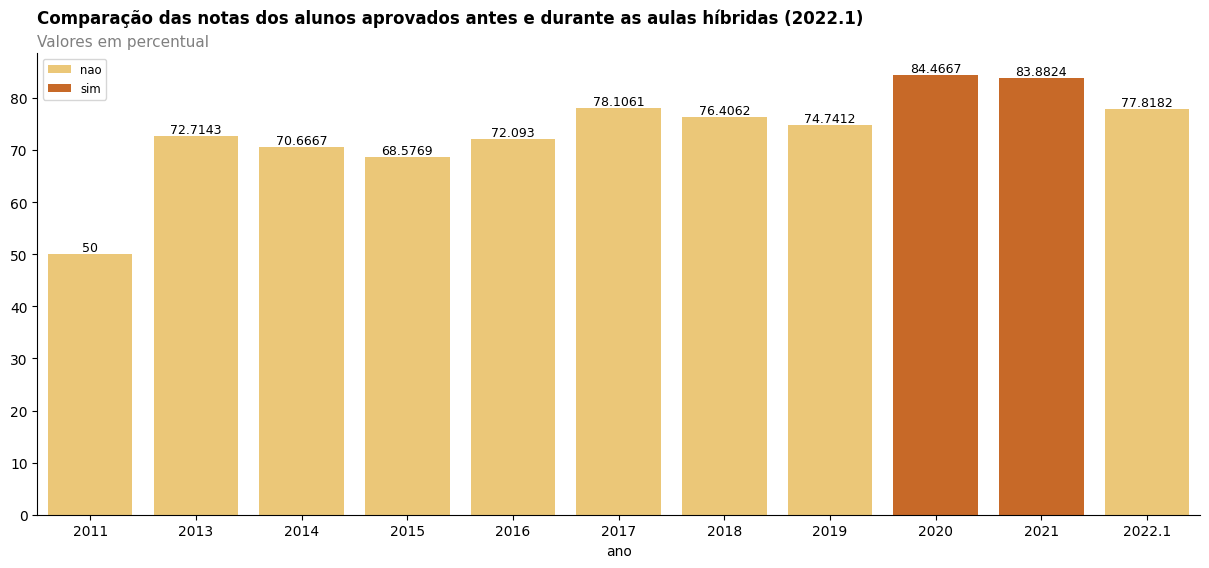

In [30]:
plot_grafico(df_notas_periodo_1,'ano','nota','YlOrBr','ano_de_pandemia','Comparação das notas dos alunos aprovados antes e durante as aulas híbridas (2022.1)','Valores em percentual',90)

In [31]:
df_cancelamentos_periodo_1 = df[['matricula','periodo','ano','nota','status','situacaoDiscente']]
df_cancelamentos_periodo_1 =df_cancelamentos_periodo_1.drop(df_cancelamentos_periodo_1[(df_cancelamentos_periodo_1['ano'] == 2022) & (df_cancelamentos_periodo_1['periodo'] == '2')].index)
df_cancelamentos_periodo_1['ano'] = df_cancelamentos_periodo_1['ano'].replace(2022,'2022.1')
df_cancelamentos_periodo_1 = df_cancelamentos_periodo_1.groupby('ano')['status'].value_counts(normalize=True).unstack()['Cancelado'].reset_index()
df_cancelamentos_periodo_1['Cancelado'] = df_cancelamentos_periodo_1['Cancelado'] * 100
df_cancelamentos_periodo_1['ano_de_pandemia'] = df_cancelamentos_periodo_1['ano'].apply(ano_de_pandemia)

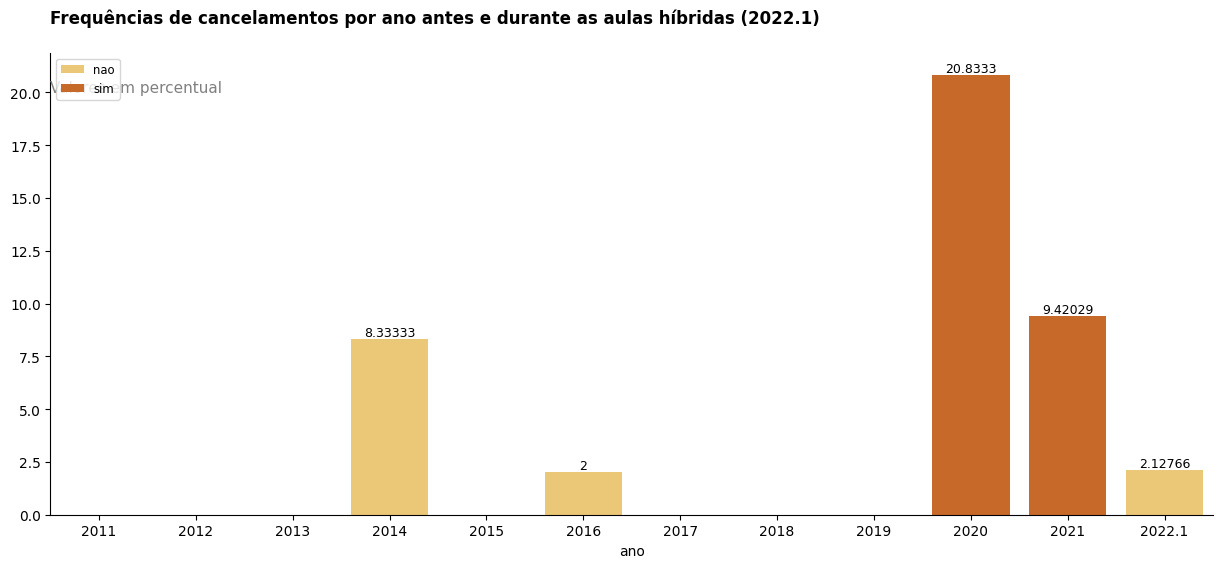

In [32]:
plot_grafico(df_cancelamentos_periodo_1,'ano','Cancelado','YlOrBr','ano_de_pandemia','Frequências de cancelamentos por ano antes e durante as aulas híbridas (2022.1)','Valores em percentual',20)

In [33]:
df_reprovados_periodo_1 = df[['matricula','periodo','ano','nota','status','situacaoDiscente','reprovado']]
df_reprovados_periodo_1 =df_reprovados_periodo_1.drop(df_reprovados_periodo_1[(df_reprovados_periodo_1['ano'] == 2022) & (df_reprovados_periodo_1['periodo'] == '2')].index)
df_reprovados_periodo_1['ano'] = df_reprovados_periodo_1['ano'].replace(2022,'2022.1')
df_reprovados_periodo_1 = df_reprovados_periodo_1.groupby('ano')['reprovado'].value_counts(normalize=True).unstack()['sim'].reset_index()
df_reprovados_periodo_1['sim'] = df_reprovados_periodo_1['sim'] * 100
df_reprovados_periodo_1['ano_de_pandemia'] = df_reprovados_periodo_1['ano'].apply(ano_de_pandemia)

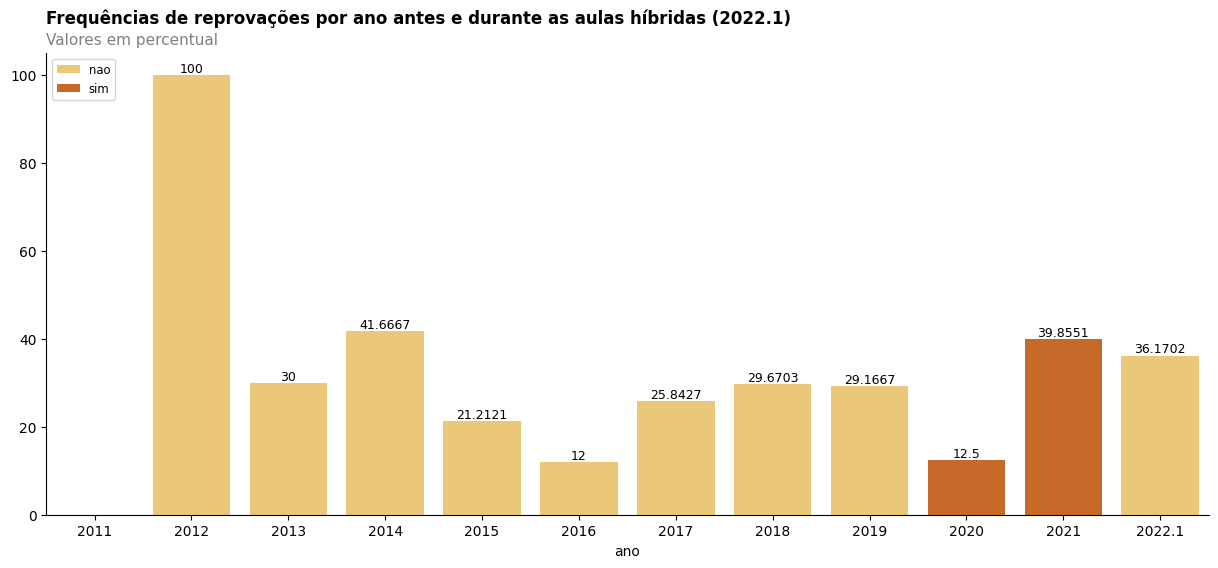

In [34]:
plot_grafico(df_reprovados_periodo_1,'ano','sim','YlOrBr','ano_de_pandemia','Frequências de reprovações por ano antes e durante as aulas híbridas (2022.1)','Valores em percentual',107)

Análise: Os gráficos da questão 6 são praticamente idênticos aos da questão 5, já que ao falar do ano de 2022, estamos falando basicamente apenas do primeiro semetre, o segundo semestre não possui qualquer registro de rendimento acadêmico, todos os alunos ainda estão no status matriculados. Mesmo assim, decidi renomear a coluna de 2022 para 2022.1 (período em que as aulas voltaram no modelo híbrido). Nenhuma mudança significativa foi observada quando comparada às análises anteriores.

7. Compare a volta às aulas presencial (2022 período 2) com a volta híbrida do item anterior.



In [36]:
#Contagem de alunos matriculados em cada semestre de 2022
analise_2022 = df[['matricula','periodo','ano','nota','status','situacaoDiscente','reprovado']]
analise_2022 = analise_2022[analise_2022['ano'] == 2022]
analise_matriculados_2022 = analise_2022.groupby('periodo').size().reset_index(name='contagem')
analise_matriculados_2022


,periodo,contagem
0,1,94
1,2,27


Análise: O dataset em questão não possui muitos registros referentes ao segundo semestre de 2022, todos os alunos nesse período estão com o status Matriculado, sendo essa a única possibilidade de comparação com o período anterior. Foi observado uma queda percentual de 71% no número de matriculados entre o primeiro semestre de 2022 e o segundo semestre de 2022. Ademais, não é possível fazer qualquer outra comparação referente à rendimento acadêmico.